# {INCOMPLETE}:
- Try and calculate the minimum from the graph (only using code -- veryify calculations however)
    - This would complete the task
- For the curve of best fit, calculate R^2 and state that the minimum is approximate but close to true value 
- Try and get this to be a dynamic thing (where there is a slider that shows this):
    - https://www.youtube.com/watch?v=p-xJsc6LSx0 # the better video 
    - https://youtu.be/CTlXX_-8rHI?si=PPg7LJgJZzIHKV_n # a more specific video (I will only use the one above)

### Final Code

In [ ]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
def task3():
    # define constants
    c = 299792458 # speed of light
    d = 60
    y = 15 # the constant height
    
    # define the independent variable x
    x = np.linspace(0,50,100)
    
    # define t
    t = [(1/c) * ((m.sqrt((i**2) + (y**2))) + m.sqrt(((d-i)**2) + (y**2))) for i in x]
    
    best_fit_ = np.polyfit(x, t, 2)
    coefs = np.poly1d(best_fit_)
    
    a = coefs[0]
    b = coefs[1]
    c = coefs[2]
    
    print(coefs)
    
    x_new = np.linspace(x[0], x[-1],1000)
    y_new = coefs(x_new)
    
    plt.scatter(x,t)
    plt.plot(x_new, y_new)
    plt.show()
    
task3()

More efficient way of doing this (I wasted so much time on this and it was easy)

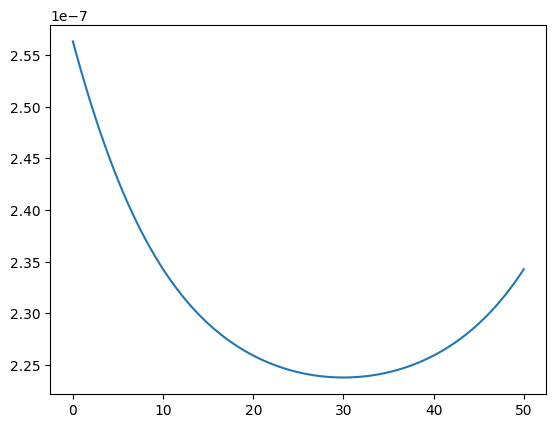

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
def task3():
    # define constants
    c = 299792458 # speed of light
    d = 60
    y = 15 # the constant height
    
    # define the independent variable x
    x = np.linspace(0,50,100)
    
    # define t
    t = (1/c) * (np.sqrt(x**2 + y**2) + np.sqrt((d-x)**2 + y**2))

    plt.plot(x,t)
    plt.show()
    
task3()

### Interactive Diagrams (as an intro)

Use the slider function and make it all nice